In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from bs4 import BeautifulSoup as bs
from pymongo import MongoClient


In [2]:
#CARGAR ARCHIVO DE LECTURAS DE ZANAHORIA 

In [3]:
# Especifica la ruta del archivo CSV
file_path = "zanahoriaUltimo.csv"


# Lee el CSV especificando los tipos de datos
df = pd.read_csv(file_path, dtype={'temperatura': float, 'humedad': float, 'ph': float})

# Convierte la columna de fecha a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Verifica los tipos de datos
print(df.dtypes)
df

fecha          datetime64[ns]
humedad               float64
temperatura           float64
ph                    float64
dtype: object


,fecha,humedad,temperatura,ph
0,2024-03-27,93.0,3.0,6.2
1,2024-03-02,94.0,4.0,6.0
2,2024-03-18,91.0,2.0,6.4
3,2024-03-14,95.0,1.0,6.3
4,2024-04-18,90.0,0.0,6.5
...,...,...,...,...
2355,2024-03-29,590.0,580.0,35.5
2356,2024-04-28,500.0,570.0,3.0
2357,2024-03-31,600.0,590.0,36.0
2358,2024-03-19,510.0,580.0,2.9


In [4]:
#LIMPIEZA DE DATOS

In [5]:
# Rellena los valores nulos con 0
df.fillna(0, inplace=True)
 #eliminar filas sin valores
df = df[(df.iloc[:, 1:] != 0).any(axis=1)]
df

,fecha,humedad,temperatura,ph
0,2024-03-27,93.0,3.0,6.2
1,2024-03-02,94.0,4.0,6.0
2,2024-03-18,91.0,2.0,6.4
3,2024-03-14,95.0,1.0,6.3
4,2024-04-18,90.0,0.0,6.5
...,...,...,...,...
2355,2024-03-29,590.0,580.0,35.5
2356,2024-04-28,500.0,570.0,3.0
2357,2024-03-31,600.0,590.0,36.0
2358,2024-03-19,510.0,580.0,2.9


In [6]:
#VALORES ESTADISTICOS ANTES DE SACAR VALORES ATIPICOS 

In [7]:
# Calcular estadísticas
max_temperatura = df['temperatura'].max()
min_temperatura = df['temperatura'].min()
mean_temperatura = df['temperatura'].mean()

max_humedad = df['humedad'].max()
min_humedad = df['humedad'].min()
mean_humedad = df['humedad'].mean()

max_ph = df['ph'].max()
min_ph = df['ph'].min()
mean_ph = df['ph'].mean()

print(f'Maximo de temperatura: {max_temperatura}')
print(f'Maximo de humedad: {max_humedad}')
print(f'Maximo de pH: {max_ph}')
print(f'Promedio de temperatura: {mean_temperatura}')
print(f'Promedio de humedad: {mean_humedad}')
print(f'Promedio de pH: {mean_ph}')
print(f'Minimo de temperatura: {min_temperatura}')
print(f'Minimo de humedad: {min_humedad}')
print(f'Minimo de pH: {min_ph}')

Maximo de temperatura: 600.0
Maximo de humedad: 610.0
Maximo de pH: 36.5
Promedio de temperatura: 36.71779661016949
Promedio de humedad: 110.57542372881356
Promedio de pH: 6.946440677966103
Minimo de temperatura: 0.0
Minimo de humedad: 5.0
Minimo de pH: 0.0


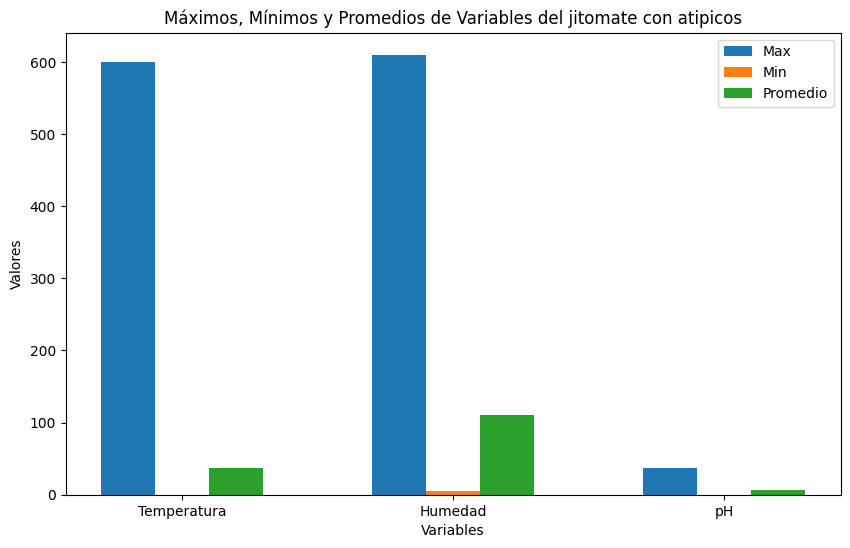

In [8]:
# Crear un DataFrame con las estadísticas
estadisticas = pd.DataFrame({
    'Variable': ['Temperatura', 'Humedad', 'pH'],
    'Max': [max_temperatura, max_humedad, max_ph],
    'Min': [min_temperatura, min_humedad, min_ph],
    'Promedio': [mean_temperatura, mean_humedad, mean_ph]
})

# Configurar las dimensiones de la gráfica
plt.figure(figsize=(10, 6))

# Gráfica de barras para máximos, mínimos y promedios
bar_width = 0.2
index = range(len(estadisticas)) 

plt.bar(index, estadisticas['Max'], bar_width, label='Max')
plt.bar([i + bar_width for i in index], estadisticas['Min'], bar_width, label='Min')
plt.bar([i + 2 * bar_width for i in index], estadisticas['Promedio'], bar_width, label='Promedio')

# Añadir etiquetas y título
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Máximos, Mínimos y Promedios de Variables del jitomate con atipicos')
plt.xticks([i + bar_width for i in index], estadisticas['Variable'])
plt.legend()

# Mostrar la gráfica
plt.show()

In [9]:
# Obtener descripción estadística general
descripcion_estadistica = df.describe()
print(descripcion_estadistica)

                               fecha      humedad  temperatura           ph
count                           2360  2360.000000  2360.000000  2360.000000
mean   2024-03-31 14:15:27.457626880   110.575424    36.717797     6.946441
min              2024-03-01 00:00:00     5.000000     0.000000     0.000000
25%              2024-03-16 00:00:00    91.000000     1.000000     6.100000
50%              2024-04-01 00:00:00    93.000000     2.000000     6.300000
75%              2024-04-16 00:00:00    94.000000     4.000000     6.400000
max              2024-04-30 00:00:00   610.000000   600.000000    36.500000
std                              NaN    77.304802   107.452039     4.076279


In [10]:
#CHECAR VALORES ATIPICOS CON CONDICIONES OPTIMAS DEL JITOMATE

In [11]:
#TEMPERATURA MÁXIMA
# Define el valor de umbral y el valor de reemplazo
max = 30
# Crear una máscara booleana para encontrar los valores que cumplen la condición
mask = df['temperatura'] > max
# Contar el número de modificaciones
num_modificaciones = mask.sum()
# Aplicar la condición y reemplazar los valores
df.loc[mask, 'temperatura'] = max
# Verificar los cambios y el número de modificaciones
print(df.head())
print(f'Número de modificaciones de maximos: {num_modificaciones}')

#TEMPERATURA MINIMA
# Define el valor de umbral y el valor de reemplazo
min= 5
# Crear una máscara booleana para encontrar los valores que cumplen la condición
mask2 = df['temperatura'] < min
# Contar el número de modificaciones
num_modificaciones2 = mask2.sum()
# Aplicar la condición y reemplazar los valores
df.loc[mask2, 'temperatura'] = min
# Verificar los cambios y el número de modificaciones
print(df.head())
print(f'Número de modificaciones de minimos: {num_modificaciones2}')

       fecha  humedad  temperatura   ph
0 2024-03-27     93.0          3.0  6.2
1 2024-03-02     94.0          4.0  6.0
2 2024-03-18     91.0          2.0  6.4
3 2024-03-14     95.0          1.0  6.3
4 2024-04-18     90.0          0.0  6.5
Número de modificaciones de maximos: 298
       fecha  humedad  temperatura   ph
0 2024-03-27     93.0          5.0  6.2
1 2024-03-02     94.0          5.0  6.0
2 2024-03-18     91.0          5.0  6.4
3 2024-03-14     95.0          5.0  6.3
4 2024-04-18     90.0          5.0  6.5
Número de modificaciones de minimos: 2042


In [12]:
#HUMEDAD MÁXIMA
# Define el valor de umbral y el valor de reemplazo
max = 90
# Crear una máscara booleana para encontrar los valores que cumplen la condición
mask = df['humedad'] > max
# Contar el número de modificaciones
num_modificaciones = mask.sum()
# Aplicar la condición y reemplazar los valores
df.loc[mask, 'humedad'] = max
# Verificar los cambios y el número de modificaciones
print(df.head())
print(f'Número de modificaciones de maximos: {num_modificaciones}')

#HUMEDAD MINIMA
# Define el valor de umbral y el valor de reemplazo
min= 60
# Crear una máscara booleana para encontrar los valores que cumplen la condición
mask2 = df['humedad'] < min
# Contar el número de modificaciones
num_modificaciones2 = mask2.sum()
# Aplicar la condición y reemplazar los valores
df.loc[mask2, 'humedad'] = min
# Verificar los cambios y el número de modificaciones
print(df.head())
print(f'Número de modificaciones de minimos: {num_modificaciones2}')

       fecha  humedad  temperatura   ph
0 2024-03-27     90.0          5.0  6.2
1 2024-03-02     90.0          5.0  6.0
2 2024-03-18     90.0          5.0  6.4
3 2024-03-14     90.0          5.0  6.3
4 2024-04-18     90.0          5.0  6.5
Número de modificaciones de maximos: 1938
       fecha  humedad  temperatura   ph
0 2024-03-27     90.0          5.0  6.2
1 2024-03-02     90.0          5.0  6.0
2 2024-03-18     90.0          5.0  6.4
3 2024-03-14     90.0          5.0  6.3
4 2024-04-18     90.0          5.0  6.5
Número de modificaciones de minimos: 56


In [13]:
#PH MÁXIMO
# Define el valor de umbral y el valor de reemplazo
max = 7.5
# Crear una máscara booleana para encontrar los valores que cumplen la condición
mask = df['ph'] > max
# Contar el número de modificaciones
num_modificaciones = mask.sum()
# Aplicar la condición y reemplazar los valores
df.loc[mask, 'ph'] = max
# Verificar los cambios y el número de modificaciones
print(df.head())
print(f'Número de modificaciones de maximos: {num_modificaciones}')

#PH MINIMO
# Define el valor de umbral y el valor de reemplazo
min= 5.5
# Crear una máscara booleana para encontrar los valores que cumplen la condición
mask2 = df['ph'] < min
# Contar el número de modificaciones
num_modificaciones2 = mask2.sum()
# Aplicar la condición y reemplazar los valores
df.loc[mask2, 'ph'] = min
# Verificar los cambios y el número de modificaciones
print(df.head())
print(f'Número de modificaciones de minimos: {num_modificaciones2}')

       fecha  humedad  temperatura   ph
0 2024-03-27     90.0          5.0  6.2
1 2024-03-02     90.0          5.0  6.0
2 2024-03-18     90.0          5.0  6.4
3 2024-03-14     90.0          5.0  6.3
4 2024-04-18     90.0          5.0  6.5
Número de modificaciones de maximos: 150
       fecha  humedad  temperatura   ph
0 2024-03-27     90.0          5.0  6.2
1 2024-03-02     90.0          5.0  6.0
2 2024-03-18     90.0          5.0  6.4
3 2024-03-14     90.0          5.0  6.3
4 2024-04-18     90.0          5.0  6.5
Número de modificaciones de minimos: 132


In [14]:
#VALORES ESTADISTICOS CON DATOS LIMPIOS

In [15]:
# Calcular estadísticas
max_temperatura = df['temperatura'].max()
min_temperatura = df['temperatura'].min()
mean_temperatura = df['temperatura'].mean()

max_humedad = df['humedad'].max()
min_humedad = df['humedad'].min()
mean_humedad = df['humedad'].mean()

max_ph = df['ph'].max()
min_ph = df['ph'].min()
mean_ph = df['ph'].mean()

print(f'Maximo de temperatura: {max_temperatura}')
print(f'Maximo de humedad: {max_humedad}')
print(f'Maximo de pH: {max_ph}')
print(f'Promedio de temperatura: {mean_temperatura}')
print(f'Promedio de humedad: {mean_humedad}')
print(f'Promedio de pH: {mean_ph}')
print(f'Minimo de temperatura: {min_temperatura}')
print(f'Minimo de humedad: {min_humedad}')
print(f'Minimo de pH: {min_ph}')

Maximo de temperatura: 30.0
Maximo de humedad: 90.0
Maximo de pH: 7.5
Promedio de temperatura: 8.279661016949152
Promedio de humedad: 89.09745762711864
Promedio de pH: 6.325677966101695
Minimo de temperatura: 5.0
Minimo de humedad: 60.0
Minimo de pH: 5.5


In [16]:
#GRAFICA DE VALORES ESTADISTICOS 

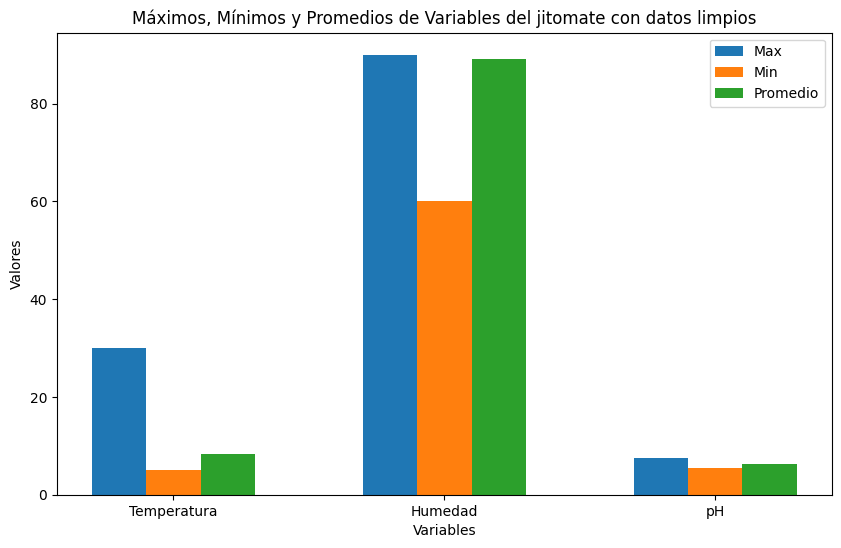

In [17]:
# Crear un DataFrame con las estadísticas
estadisticas = pd.DataFrame({
    'Variable': ['Temperatura', 'Humedad', 'pH'],
    'Max': [max_temperatura, max_humedad, max_ph],
    'Min': [min_temperatura, min_humedad, min_ph],
    'Promedio': [mean_temperatura, mean_humedad, mean_ph]
})

# Configurar las dimensiones de la gráfica
plt.figure(figsize=(10, 6))

# Gráfica de barras para máximos, mínimos y promedios
bar_width = 0.2
index = range(len(estadisticas))

plt.bar(index, estadisticas['Max'], bar_width, label='Max')
plt.bar([i + bar_width for i in index], estadisticas['Min'], bar_width, label='Min')
plt.bar([i + 2 * bar_width for i in index], estadisticas['Promedio'], bar_width, label='Promedio')

# Añadir etiquetas y título
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Máximos, Mínimos y Promedios de Variables del jitomate con datos limpios')
plt.xticks([i + bar_width for i in index], estadisticas['Variable'])
plt.legend()

# Mostrar la gráfica
plt.show()

In [18]:
#INSERTAR DATOS ESTADISTICOS EN MONGODB

In [18]:
# Datos a insertar
data = {
    "vegetal": "zanahoria",
    "estadisticas": {
        "temperatura": {
            "max": max_temperatura,
            "min": min_temperatura,
            "promedio": mean_temperatura
        },
        "humedad": {
            "max": max_humedad,
            "min": min_humedad,
            "promedio": mean_humedad
        },
        "ph": {
            "max": max_ph,
            "min": min_ph,
            "promedio": mean_ph
        }
    }
}

# Conectar a MongoDB
client = MongoClient('mongodb://localhost:27017/')  # Reemplaza con tu URI de MongoDB si es diferente

# Crear base de datos y colección
db = client['agricultura']
collection = db['estadisticas_zanahoria']

# Insertar datos en la colección
collection.insert_one(data)
print("Datos insertados en MongoDB")

Datos insertados en MongoDB
